In [1]:
# Last update: 2021-01-05
# Imports:
import glob  # To loop t files
import os  # To find the current working directory
import ast # Strings to lists
import math  # To check for NaNs
import pandas as pd  # For DataFrame
import numpy as np  # For its arrays
import matplotlib.pyplot as plt  # For plots
import scipy.stats as sts  # For statistics


In [2]:
# Read in data and convert labels to vector:
path = os.path.join(os.getcwd(), "responses")
all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f, index_col=None) for f in all_files))
df.reset_index(drop=True, inplace=True)  # Drop the original index
print(df.head())
print(df.tail())
print("Input data shape:", df.shape)


   LL_AttemptsForProgress_0  LL_AttemptsForProgress_1  \
0                       3.0                       1.0   
1                       1.0                       1.0   
2                       8.0                       1.0   
3                       NaN                       NaN   
4                       NaN                       NaN   

   LL_AttemptsForProgress_2  LL_AttemptsForProgress_3  \
0                       2.0                       2.0   
1                       1.0                       1.0   
2                       1.0                       1.0   
3                       NaN                       NaN   
4                       NaN                       NaN   

                   LL_CorrectKeyword                LL_DetectedCommands  \
0           [0, 0, 1, 1, 0, 1, 0, 1]           [2, 2, 0, 1, 1, 2, 0, 3]   
1                       [1, 1, 1, 1]                       [4, 5, 2, 3]   
2  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]  [2, 1, 2, 1, 2, 1, 3, 0, 1, 4, 5]   
3             

C:\Users\emmav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [3]:
# Remove all practice trials:
df = df[df.practice == "no"]


In [4]:
# Remove all the columns that are exactly the same for each of the rows:
only_LL = df

for col in df.columns:
    if not col.startswith("LL_") and col != "subject_nr" and col != "order" and col != "interface":
        only_LL = only_LL.drop(col, axis=1)
only_LL.reset_index(drop=True, inplace=True)


In [5]:
# See which columns remain:
print(only_LL.columns)


Index(['LL_AttemptsForProgress_0', 'LL_AttemptsForProgress_1',
       'LL_AttemptsForProgress_2', 'LL_AttemptsForProgress_3',
       'LL_CorrectKeyword', 'LL_DetectedCommands', 'LL_ProgressTrialFailedAt',
       'LL_TimeITIEnd', 'LL_TimeITIStart', 'LL_TimeKeywordDetection',
       'LL_TimeStartListening', 'LL_TimeStopListening', 'LL_TimeTrialEnd',
       'LL_TimeTrialStart', 'LL_TrialStatus', 'interface', 'order',
       'subject_nr'],
      dtype='object')


In [6]:
# Get rid of the NaNs:
for i, correct_keyword in enumerate(only_LL["LL_CorrectKeyword"]):
    correct_keyword_list = ast.literal_eval(correct_keyword)  # Convert string to list
    
    attempt = 0  # Attempts so far by the participant to successfully do a command
    counter = 0  # Of the so-called Progress, the x-th command
    
    for correct in correct_keyword_list:
        assert counter < 4
        attempt += 1
        if correct == 1:
            only_LL.loc[i, "LL_AttemptsForProgress_" + str(counter)] = attempt
            counter += 1
            attempt = 0
    
    # Usually not all four progresses have been done in a failed trial, so fix those here:
    while counter < 4:
        if math.isnan(only_LL.loc[i, "LL_AttemptsForProgress_" + str(counter)]):
            only_LL.loc[i, "LL_AttemptsForProgress_" + str(counter)] = attempt
        counter += 1
        attempt = 0


In [7]:
# Add the amount of made mistakes per trial and whether a trial was a mistake or not:
only_LL['mistakes'] = [x.count('0') for x in only_LL['LL_CorrectKeyword']]
only_LL['timeout'] = [int(x.count('1') < 4) for x in only_LL['LL_CorrectKeyword']]

# Add the average time of a trial:
only_LL['trialtime'] = only_LL['LL_TimeTrialEnd'] - only_LL['LL_TimeTrialStart']


In [8]:
# Inspect the result:
only_LL


,LL_AttemptsForProgress_0,LL_AttemptsForProgress_1,LL_AttemptsForProgress_2,LL_AttemptsForProgress_3,LL_CorrectKeyword,LL_DetectedCommands,LL_ProgressTrialFailedAt,LL_TimeITIEnd,LL_TimeITIStart,LL_TimeKeywordDetection,...,LL_TimeStopListening,LL_TimeTrialEnd,LL_TimeTrialStart,LL_TrialStatus,interface,order,subject_nr,mistakes,timeout,trialtime
0,0.0,0.0,0.0,0.0,[],[],NaN,1.609196e+09,1.609196e+09,[],...,[1609195520.0234573],1.609196e+09,1.609196e+09,success,gestural,"[0, 3, 2, 1]",0,0,1,6.313448
1,0.0,0.0,0.0,0.0,[],[],NaN,1.609196e+09,1.609196e+09,[],...,[1609195529.5819032],1.609196e+09,1.609196e+09,success,gestural,"[3, 1, 0, 5]",0,0,1,6.280429
2,0.0,0.0,0.0,0.0,[],[],NaN,1.609196e+09,1.609196e+09,[],...,[1609195539.0514784],1.609196e+09,1.609196e+09,success,gestural,"[5, 3, 0, 4]",0,0,1,6.220936
3,1.0,0.0,0.0,0.0,[0],[2],NaN,1.609196e+09,1.609196e+09,[1609195547.0030756],...,"[1609195547.0030756, 1609195560.9101777]",1.609196e+09,1.609196e+09,success,gestural,"[0, 3, 4, 2]",0,1,1,18.550494
4,1.0,1.0,1.0,1.0,"[1, 1, 1, 1]","[5, 1, 2, 3]",NaN,1.609196e+09,1.609196e+09,"[1609195569.2287478, 1609195581.9229696, 16091...",...,"[1609195569.2287478, 1609195581.9229696, 16091...",1.609196e+09,1.609196e+09,success,gestural,"[5, 1, 2, 3]",0,0,0,55.358724
5,1.0,2.0,1.0,1.0,"[1, 0, 1, 1, 1]","[3, 1, 0, 4, 2]",NaN,1.609196e+09,1.609196e+09,"[1609195627.9256763, 1609195640.3439653, 16091...",...,"[1609195627.9256763, 1609195640.3439653, 16091...",1.609196e+09,1.609196e+09,success,gestural,"[3, 0, 4, 2]",0,1,0,63.068013
6,1.0,1.0,1.0,1.0,"[1, 1, 1, 1]","[3, 1, 0, 5]",NaN,1.609196e+09,1.609196e+09,"[1609195916.2044234, 1609195927.1323252, 16091...",...,"[1609195916.2044234, 1609195927.131322, 160919...",1.609196e+09,1.609196e+09,success,vocal,"[3, 1, 0, 5]",0,0,0,44.791136
7,1.0,1.0,0.0,0.0,"[1, 1]","[3, 4]",NaN,1.609196e+09,1.609196e+09,"[1609195964.3211377, 1609195975.4454372]",...,"[1609195964.3211377, 1609195975.4444318, 16091...",1.609196e+09,1.609196e+09,success,vocal,"[3, 4, 2, 1]",0,0,1,29.132409
8,1.0,1.0,1.0,0.0,"[1, 1, 1]","[4, 1, 0]",NaN,1.609196e+09,1.609196e+09,"[1609195996.8739624, 1609196007.6801827, 16091...",...,"[1609195996.8729632, 1609196007.6801827, 16091...",1.609196e+09,1.609196e+09,success,vocal,"[4, 1, 0, 2]",0,0,1,40.205936
9,0.0,0.0,0.0,0.0,[],[],NaN,1.609196e+09,1.609196e+09,[],...,[1609196043.813244],1.609196e+09,1.609196e+09,success,vocal,"[0, 2, 3, 5]",0,0,1,6.362897


In [9]:
# Get the average of the interesting variables per participant, per interface:
mean_mistakes = only_LL.groupby(['subject_nr', 'interface']).mean()['mistakes']
mean_trialtime = only_LL.groupby(['subject_nr', 'interface', 'timeout']).mean()['trialtime']
mean_succes_trialtime = mean_trialtime[:,:,0]


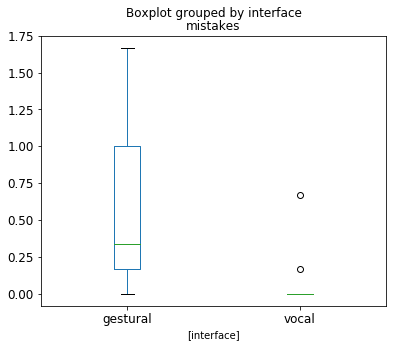

Ttest_relResult(statistic=3.6253078686998625, pvalue=0.0022743074543172446)


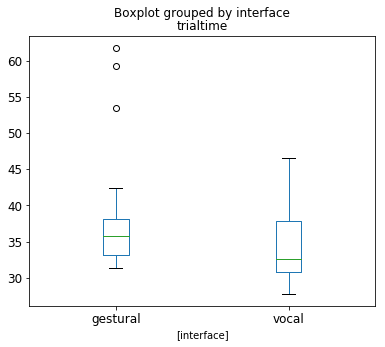

Ttest_relResult(statistic=2.775962808238544, pvalue=0.013493613486890474)


In [19]:
# Make plots and calculate significance with a dependent t-test:
mean_mistakes.to_frame().boxplot(by='interface', grid=False, figsize=(6,5), fontsize=12)
plt.show()
print(sts.ttest_rel(list(mean_mistakes[:,'gestural']), list(mean_mistakes[:,'vocal'])))
mean_succes_trialtime.to_frame().boxplot(by='interface', grid=False, figsize=(6,5), fontsize=12)
plt.show()
print(sts.ttest_rel(list(mean_succes_trialtime[:,'gestural']), list(mean_succes_trialtime[:,'vocal'])))